In [22]:
#Charger les biblio
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import string
from subprocess import check_output
import seaborn as sns
from pylab import *
%matplotlib inline
sns.set()

In [23]:
#Importation de la table
df = pd.read_csv("tab_A7_6mn.csv", sep = ',')
#Lire la table en dataframe
df = pd.DataFrame(df)
df.head()

,rgs,pr,m,js,jma,hhmm,To,Q,Vitesse,A,Code
0,759#M7I,264,687,Ve,01/01/16,00:00,1,340,95,759,M7I
1,760#M7J,265,320,Ve,01/01/16,00:00,3,360,103,760,M7J
2,709#M7i,264,687,Ve,01/01/16,00:00,2,510,99,709,M7i
3,710#M7j,265,320,Ve,01/01/16,00:00,1,290,97,710,M7j
4,764#M7N,267,230,Ve,01/01/16,00:00,0,0,0,764,M7N


In [24]:
selection = (df['Q'] <= 6000)
q = df[selection]
### Vitesse horaire
selection = (df['Vitesse'] <= 160)
v = df[selection]
### To horaire
selection = (df['To'] <= 100)
t = df[selection]
### Débit et TO incompatibles
selection =  (df['Q'] > 5)
qq = df[selection]
### Vitesse horaire
selection = (df['Vitesse'] > 0)
vv = df[selection]
### To horaire
selection = (df['To'] > 0)
tt = df[selection]
# Transformer les donnees a des dataframe
lst = [q,v,t,qq,vv,tt]
for i in lst :
    i = pd.DataFrame(i)

In [25]:
# Eliminer les valeurs aberrantes
inter1 = pd.merge(q, v, how='inner')
inter2 = pd.merge(t, qq, how='inner')
inter3 = pd.merge(vv, tt, how='inner')
inter4 = pd.merge(inter1, inter2, how='inner')
df = pd.merge(inter3, inter4, how='inner')
df.describe()

,pr,m,To,Q,Vitesse,A
count,978220.000000,978220.000000,978220.000000,978220.000000,978220.000000,978220.000000
mean,271.635782,494.627473,10.861530,2076.327023,88.658586,792.809158
std,4.277659,274.310524,10.205109,1438.277246,14.057490,51.593181
min,264.000000,86.000000,1.000000,10.000000,1.000000,709.000000
25%,269.000000,278.000000,3.000000,780.000000,82.000000,760.000000
50%,272.000000,440.000000,8.000000,1810.000000,90.000000,805.000000
75%,275.000000,790.000000,16.000000,3190.000000,98.000000,851.000000
max,279.000000,900.000000,100.000000,6000.000000,160.000000,865.000000


Pour les données 6 minutes, on les traite sur les jours ouvrés, donc on élimine les données du week-end.

In [26]:
df = df[~df['js'].astype(str).str.startswith('Sa')]
df = df[~df['js'].astype(str).str.startswith('Di')]
df.head()

,rgs,pr,m,js,jma,hhmm,To,Q,Vitesse,A,Code
0,759#M7I,264,687,Ve,01/01/16,00:00,1,340,95,759,M7I
1,760#M7J,265,320,Ve,01/01/16,00:00,3,360,103,760,M7J
2,709#M7i,264,687,Ve,01/01/16,00:00,2,510,99,709,M7i
3,710#M7j,265,320,Ve,01/01/16,00:00,1,290,97,710,M7j
4,765#M7O,267,861,Ve,01/01/16,00:00,1,360,103,765,M7O


Pour ajouter la concentration nous servons de l’équation suivante : $K = Q/V$. Ces trois variables sont reliées par la relation $Q=K\times V$.

In [27]:
# Ajouter le champs de Concentration K
df['K'] = (df['Q'])/(df['Vitesse'])
#Trier la table par heure.
df = df.sort_values(by = 'hhmm')
df.describe()

,pr,m,To,Q,Vitesse,A,K
count,679387.000000,679387.000000,679387.000000,679387.000000,679387.000000,679387.000000,679387.000000
mean,271.613936,496.324438,12.238358,2214.834402,87.684411,792.606361,27.419988
std,4.281171,274.221317,11.134480,1500.296849,14.882436,51.592856,22.001172
min,264.000000,86.000000,1.000000,10.000000,1.000000,709.000000,0.158730
25%,269.000000,278.000000,4.000000,840.000000,81.000000,760.000000,9.148936
50%,272.000000,440.000000,10.000000,2010.000000,89.000000,805.000000,23.152174
75%,275.000000,790.000000,18.000000,3400.000000,97.000000,851.000000,40.531915
max,279.000000,900.000000,100.000000,6000.000000,160.000000,865.000000,227.777778


Text(0.5, 0.98, 'Diagramme de niveau de service, $Q=f(K)$ et $Q=f(To)$ ')

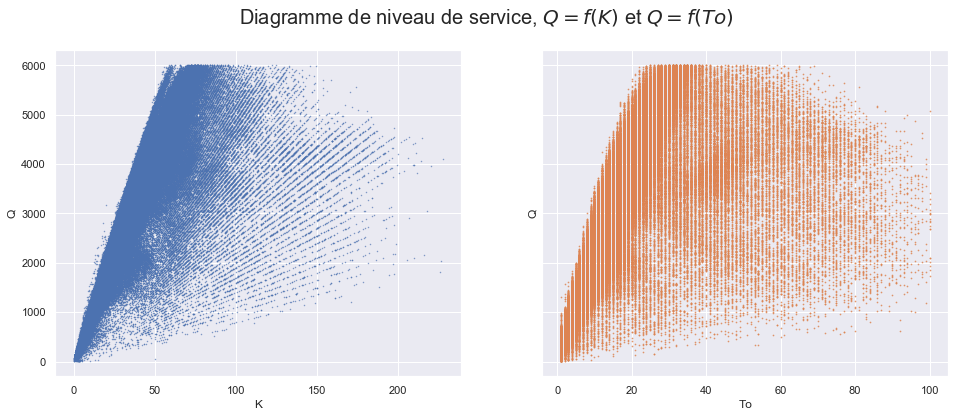

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6), sharey=True)
sns.regplot(x= df['K'], y=df['Q'], fit_reg=False,scatter_kws={'s':.2}, ax=axs[0])
sns.regplot(x= df['To'], y=df['Q'], fit_reg=False,scatter_kws={'s':.5}, ax=axs[1])
fig.suptitle("Diagramme de niveau de service, $Q=f(K)$ et $Q=f(To)$ ", fontsize=20)

In [28]:
#Identifier les donnees de chaque stations
groupe = df.groupby('Code')

In [29]:
#Table de donnees de la station M7i
M7i = groupe.get_group('M7i')
#transformer la table en dataframe
dff = pd.DataFrame(M7i)
dff.describe()

,pr,m,To,Q,Vitesse,A,K
count,22674.0,22674.0,22674.000000,22674.000000,22674.000000,22674.0,22674.000000
mean,264.0,687.0,16.645144,2438.975037,86.955500,709.0,31.115019
std,0.0,0.0,14.138722,1488.668693,13.508025,0.0,22.343376
min,264.0,687.0,1.000000,40.000000,6.000000,709.0,0.869565
25%,264.0,687.0,4.000000,860.000000,84.000000,709.0,8.865979
50%,264.0,687.0,16.000000,2930.000000,90.000000,709.0,33.200683
75%,264.0,687.0,23.000000,3680.000000,96.000000,709.0,46.049383
max,264.0,687.0,93.000000,5490.000000,118.000000,709.0,139.285714


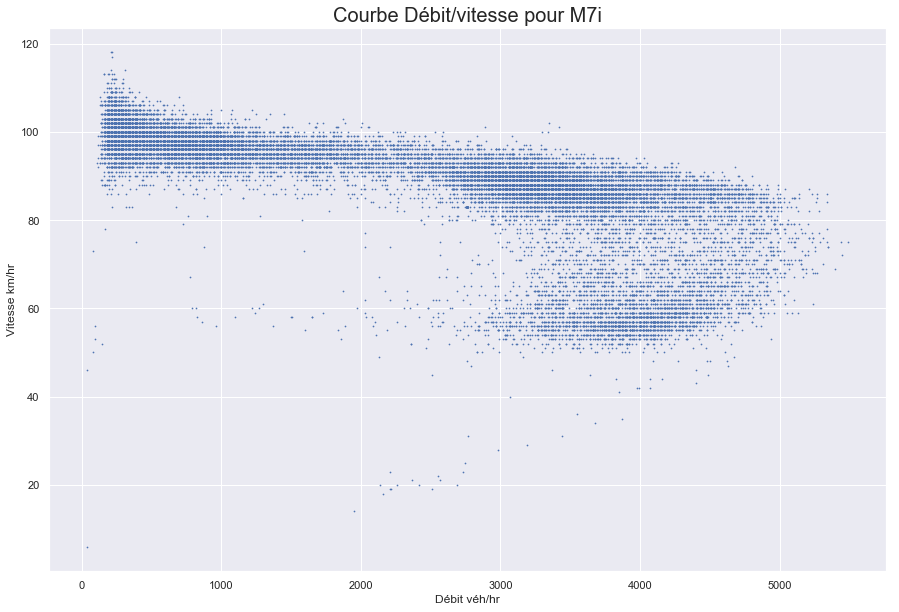

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(M7i.Q, M7i.Vitesse, s =.5)
plt.title("Courbe Débit/vitesse pour M7i",fontsize=20)
plt.xlabel('Débit véh/hr')
plt.ylabel('Vitesse km/hr')
plt.show()

##### test.D

In [30]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

x = dff['K']
y = dff['Vitesse']

In [10]:
# liste de stations
liste = groupe.groups.keys()
# Convertir liste en 'list'
keys = list(liste)
# Creation d'une liste vide
L=[]
# Mettre les tables dans la liste L par une boucle.
for i in range(44):
    
    L.append(groupe.get_group(keys[i]))

In [31]:
def func(T, a, b, c):
    return a * numpy.exp(-b*T**c)


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(x, *parameterTuple)
    return numpy.sum((y - val) ** 2.0)


def generate_Initial_Parameters():
    parameterBounds = []
    parameterBounds.append([0.0, 10.0]) # search bounds for a
    parameterBounds.append([-1.0, 1.0]) # search bounds for b
    parameterBounds.append([1.0, 1.0]) # search bounds for c

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

#by default, differential_evolution completes by calling curve_fit() using parameter bounds
geneticParameters = generate_Initial_Parameters()

In [42]:
square(4)

16

In [34]:
    
    x = dff['K']
    y = dff['Vitesse']
    fittedParameters, pcov = curve_fit(func, x, y, geneticParameters,maxfev=100000)
    #fittedParametersTT.append(fittedParameters)
    #print('La station',keys[i])
    print('Fitted parameters:', fittedParameters)
    print()

    modelPredictions = func(x, *fittedParameters) 

    absError = modelPredictions - y

    SE = numpy.square(absError) # squared errors
    MSE = numpy.mean(SE) # mean squared errors
    RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (numpy.var(absError) / numpy.var(y))
    #MSETT.append(MSE)
    #RsquaredTT.append(Rsquared)
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    print()

Fitted parameters: [9.81071222e+01 3.31745323e-05 2.25288099e+00]

RMSE: 5.410260250261642
R-squared: 0.8395751264918145



In [23]:
len(keys)

44

In [12]:
# now call curve_fit without passing bounds from the genetic algorithm,
# just in case the best fit parameters are aoutside those bounds
fittedParametersTT=[]
MSETT=[]
RsquaredTT=[]
for i in range(43):
    dff = L[i]
    x = dff['K']
    y = dff['Vitesse']
    fittedParameters, pcov = curve_fit(func, x, y, geneticParameters,maxfev=100000)
    fittedParametersTT.append(fittedParameters)
    print('La station',keys[i])
    print('Fitted parameters:', fittedParameters)
    print()

    modelPredictions = func(x, *fittedParameters) 

    absError = modelPredictions - y

    SE = numpy.square(absError) # squared errors
    MSE = numpy.mean(SE) # mean squared errors
    RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (numpy.var(absError) / numpy.var(y))
    MSETT.append(MSE)
    RsquaredTT.append(Rsquared)
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    print()



La station M7I
Fitted parameters: [9.65095174e+01 1.85450788e-06 2.78576301e+00]

RMSE: 4.738313267982959
R-squared: 0.6365017611902699

La station M7J
Fitted parameters: [1.02821896e+02 3.42579917e-06 2.64470250e+00]

RMSE: 4.779720906096866
R-squared: 0.6404881370945008

La station M7N
Fitted parameters: [1.09892584e+02 1.02991718e-03 1.59524814e+00]

RMSE: 11.48442209970731
R-squared: 0.37150940661571996

La station M7O
Fitted parameters: [1.07914862e+02 4.44861858e-07 3.11566569e+00]

RMSE: 4.020343068082597
R-squared: 0.8284461304456605

La station M7P
Fitted parameters: [ 7.21184531e-29 -6.95610947e+01 -5.26021229e-04]

RMSE: 9.99150874005863
R-squared: 0.14686360473689086

La station M7Q
Fitted parameters: [1.07202756e+02 4.55234617e-07 3.10733895e+00]

RMSE: 3.324022408339259
R-squared: 0.7863900163657602

La station M7R
Fitted parameters: [1.13271942e+02 1.25521323e-05 2.63323911e+00]

RMSE: 6.081951275916869
R-squared: 0.8045861100803245

La station M7S
Fitted parameters: [1.

KeyboardInterrupt: 

In [46]:
len(fittedParametersTT)

43

In [34]:
a = fittedParametersTT[:][0]; b = fittedParametersTT[:][1]; c = fittedParametersTT[:][2]

In [82]:
fittedParametersTT

[array([9.65095173e+01, 1.85450709e-06, 2.78576311e+00]),
 array([1.02821896e+02, 3.42579958e-06, 2.64470248e+00]),
 array([1.09892583e+02, 1.02991709e-03, 1.59524817e+00]),
 array([1.07914862e+02, 4.44861928e-07, 3.11566565e+00]),
 array([ 6.80670933e-29, -6.96189109e+01, -5.25584507e-04]),
 array([1.07202755e+02, 4.55234058e-07, 3.10733922e+00]),
 array([1.13271942e+02, 1.25521309e-05, 2.63323914e+00]),
 array([1.06164875e+02, 4.44427440e-06, 2.84857776e+00]),
 array([9.54511670e+01, 5.66821402e-05, 2.24184131e+00]),
 array([1.01522569e+02, 3.66122863e-05, 2.41880428e+00]),
 array([9.81071221e+01, 3.31745294e-05, 2.25288101e+00]),
 array([9.29338978e+01, 2.30937806e-05, 2.22905558e+00]),
 array([9.97141428e+01, 8.17319988e-04, 1.38414311e+00]),
 array([ 3.24744319e-19, -4.73252466e+01, -7.50427291e-04]),
 array([ 2.45102109e-25, -6.14159097e+01, -8.15206408e-04]),
 array([1.07147900e+02, 2.69528876e-06, 2.90330913e+00]),
 array([1.03684518e+02, 1.21037861e-07, 3.67407775e+00]),
 arra

In [87]:
fittedParametersTT[3][0]

107.91486169468385

In [89]:
for i in range(43):
    a = fittedParametersTT[i][0]
    b = fittedParametersTT[i][1]
    c = fittedParametersTT[i][2]
    C = a / (c*e*b)**(1/c)
    Kcap = 1 / (c*b)**(1/c)
    Vcap = a*exp(-b*(Kcap)**c)
    print('La station',keys[i])
    print('La capacité (𝑣éℎ/ℎ):', C)
    print('La vitesse libre (𝑘𝑚/ℎ):', a)
    print('La Concentration à capacité (𝑣éℎ/𝑘𝑚):', Kcap)
    print('La Vitesse à capacité (𝑘𝑚/ℎ):', Vcap)
    print()

La station M7I
La capacité (𝑣éℎ/ℎ): 87.84887240726225
La vitesse libre (𝑘𝑚/ℎ): 96.50951728910668
La Concentration à capacité (𝑣éℎ/𝑘𝑚): 0.9185822281508144
La Vitesse à capacité (𝑘𝑚/ℎ): 95.63528415317771

La station M7J
La capacité (𝑣éℎ/ℎ): 5683.958526266551
La vitesse libre (𝑘𝑚/ℎ): 102.82189596508323
La Concentration à capacité (𝑣éℎ/𝑘𝑚): 80.68230097585382
La Vitesse à capacité (𝑘𝑚/ℎ): 70.44864186468376

La station M7N
La capacité (𝑣éℎ/ℎ): 3266.934472268244
La vitesse libre (𝑘𝑚/ℎ): 109.8925833722405
La Concentration à capacité (𝑣éℎ/𝑘𝑚): 55.643523592389826
La Vitesse à capacité (𝑘𝑚/ℎ): 58.71185470208165

La station M7O
La capacité (𝑣éℎ/ℎ): 5942.0814681119155
La vitesse libre (𝑘𝑚/ℎ): 107.91486169468385
La Concentration à capacité (𝑣éℎ/𝑘𝑚): 75.9010765906747
La Vitesse à capacité (𝑘𝑚/ℎ): 78.28718293624266

La station M7P
La capacité (𝑣éℎ/ℎ): 0.0
La vitesse libre (𝑘𝑚/ℎ): 6.806709332127355e-29
La Concentration à capacité (𝑣éℎ/𝑘𝑚): 0.0
La Vitesse à capacité (𝑘𝑚/ℎ): inf

La station M7Q
La capaci

In [13]:
L[1].describe()

,pr,m,To,Q,Vitesse,A,K
count,20815.0,20815.0,20815.000000,20815.000000,20815.000000,20815.0,20815.000000
mean,265.0,320.0,13.757435,2693.946193,97.687197,760.0,28.852571
std,0.0,0.0,10.283659,1828.646512,7.971797,0.0,20.839525
min,265.0,320.0,1.000000,20.000000,12.000000,760.0,0.158730
25%,265.0,320.0,3.000000,750.000000,94.000000,760.0,7.326733
50%,265.0,320.0,15.000000,3200.000000,98.000000,760.0,32.947368
75%,265.0,320.0,21.000000,4170.000000,102.000000,760.0,44.516129
max,265.0,320.0,90.000000,6000.000000,152.000000,760.0,143.571429


Donc pour la station M7i

**la vitesse libre** est de : $98 km/h$.

**La capacité: $4271 véh/h$**

**Concentration à capacité ($K_{cap}$): $68 véh/km$**

**Vitesse à capacité ($V_{cap}$): $62.94 km/h$**

In [19]:
def func(T, a, b, c):
    return a * numpy.exp(-b*T**c)


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(x, *parameterTuple)
    return numpy.sum((y - val) ** 2.0)


def generate_Initial_Parameters():
    parameterBounds = []
    parameterBounds.append([0.0, 10.0]) # search bounds for a
    parameterBounds.append([-1.0, 1.0]) # search bounds for b
    parameterBounds.append([1.0, 1.0]) # search bounds for c

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

#by default, differential_evolution completes by calling curve_fit() using parameter bounds
geneticParameters = generate_Initial_Parameters()
# now call curve_fit without passing bounds from the genetic algorithm,
# just in case the best fit parameters are aoutside those bounds
fittedParametersTT=[]
MSETT=[]
RsquaredTT=[]
for i in range(43):
    dff = L[i]
    x = dff['K']
    y = dff['Vitesse']
    fittedParameters, pcov = curve_fit(func, x, y, geneticParameters,maxfev=100000)
    fittedParametersTT.append(fittedParameters)
    print('La station',keys[i])
    print('Fitted parameters:', fittedParameters)
    print()

    modelPredictions = func(x, *fittedParameters) 

    absError = modelPredictions - y

    SE = numpy.square(absError) # squared errors
    MSE = numpy.mean(SE) # mean squared errors
    RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (numpy.var(absError) / numpy.var(y))
    MSETT.append(MSE)
    RsquaredTT.append(Rsquared)
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    print()

La station M7I
Fitted parameters: [9.65095174e+01 1.85450788e-06 2.78576301e+00]

RMSE: 4.738313267982959
R-squared: 0.6365017611902699

La station M7J
Fitted parameters: [1.02821896e+02 3.42579917e-06 2.64470250e+00]

RMSE: 4.779720906096866
R-squared: 0.6404881370945008

La station M7N
Fitted parameters: [1.09892584e+02 1.02991718e-03 1.59524814e+00]

RMSE: 11.48442209970731
R-squared: 0.37150940661571996

La station M7O
Fitted parameters: [1.07914862e+02 4.44861858e-07 3.11566569e+00]

RMSE: 4.020343068082597
R-squared: 0.8284461304456605

La station M7P
Fitted parameters: [ 7.21184531e-29 -6.95610947e+01 -5.26021229e-04]

RMSE: 9.99150874005863
R-squared: 0.14686360473689086

La station M7Q
Fitted parameters: [1.07202756e+02 4.55234617e-07 3.10733895e+00]

RMSE: 3.324022408339259
R-squared: 0.7863900163657602

La station M7R
Fitted parameters: [1.13271942e+02 1.25521323e-05 2.63323911e+00]

RMSE: 6.081951275916869
R-squared: 0.8045861100803245

La station M7S
Fitted parameters: [1.

In [20]:
    dff = L[10]
    x = dff['K']
    y = dff['Vitesse']

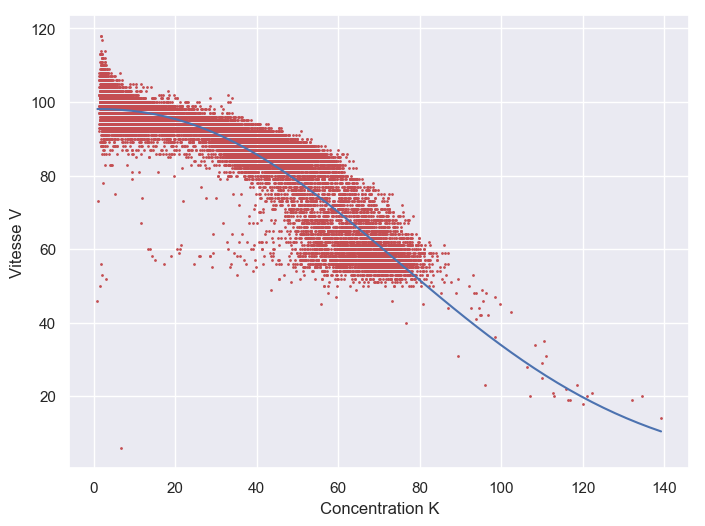

In [41]:
##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    fig = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = fig.add_subplot(111)

    # first the raw data as a scatter plot
    #axes.plot(x, y,  'D')
    axes.scatter(x, y, s=1, c='r', marker="o")
    # create data for the fitted equation plot
    xModel = numpy.linspace(min(x), max(x))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('Concentration K') # X axis data label
    axes.set_ylabel('Vitesse V') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)


In [56]:
x1 = dff['Q']

In [17]:
###the top two lines are required on my linux machine
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from scipy.optimize import curve_fit #we could import more, but this is what we need
###defining your fitfunction
def func(x, a, b, c):
    return a*np.exp(-b*x)
###OP's data
K = dff['K']
V = dff['Vitesse']
###let us guess some start values
i = [100, 100, 1]
g = [func(x,*i ) for x in K]

In [21]:
###preparing data for showing the fit
basketCont = np.linspace(min(K),max(K),50)
fittedData = [func(x, *popt) for x in basketCont]
###preparing the figure
fig1 = plt.figure(1)
ax = fig1.add_subplot(1,1,1)
###the three sets of data to plot
ax.plot(K, V, linestyle = '',marker='o', color='r',label="data")
ax.plot(K, g,linestyle='',marker='^', color='b',label="initial guess")
ax.plot(basketCont,fittedData,linestyle='-', color='#900000',label="fit with ({0:0.2g},{1:0.2g},{2:0.2g})".format(*popt))
###beautification
ax.legend(loc=0, title="graphs", fontsize=12)
ax.set_ylabel("factor")
ax.set_xlabel("baskets")
ax.grid()
ax.set_title("$\mathrm{curve}_\mathrm{fit}$")
###putting the covariance matrix nicely
tab= [['{:.2g}'.format(j) for j in i] for i in pcov]
the_table = plt.table(cellText=tab,
                  colWidths = [0.2]*3,
                  loc='upper right', bbox=[0.483, 0.35, 0.5, 0.25] )
plt.text(250,65,'covariance:',size=12)
###putting the plot
plt.show()
###done

C:\Users\oumayma.doughmi\Documents\anaconda\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


# Analyse du diagramme fondamental

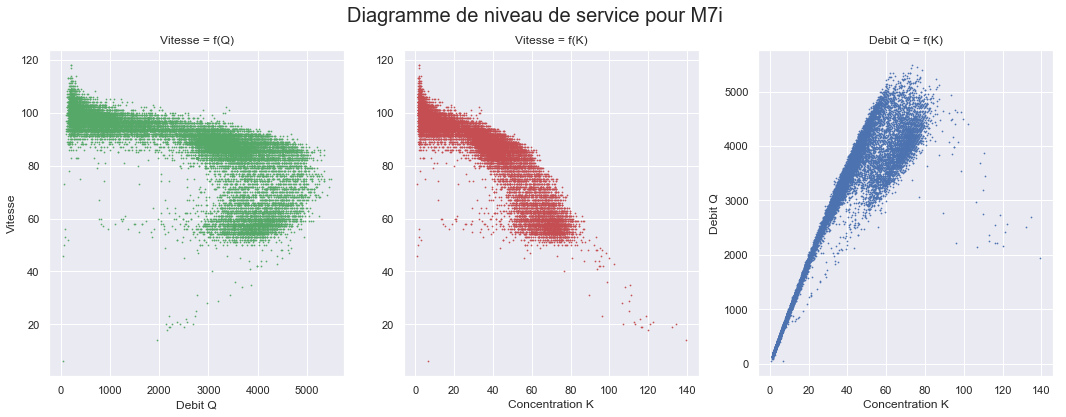

In [33]:
fig = plt.figure(figsize=(18,6))
#AXES
ax1 = fig.add_subplot(131); ax2 = fig.add_subplot(132); ax3 = fig.add_subplot(133)

#Data
ax1.scatter(M7i['Q'], M7i['Vitesse'], s=.5, c='g', marker="o")
ax2.scatter(M7i['K'], M7i['Vitesse'], s=.5, c='r', marker="o")
ax3.scatter(M7i['K'], M7i['Q'], s=.5, c='b', marker="o")

#Labels
ax1.set_xlabel('Debit Q'); ax1.set_ylabel('Vitesse')
ax2.set_xlabel('Concentration K'); fig.suptitle("Diagramme de niveau de service pour M7i", fontsize=20)
ax3.set_xlabel('Concentration K'); ax3.set_ylabel('Debit Q')
ax3.set_title('Debit Q = f(K)'); ax2.set_title('Vitesse = f(K)'); ax1.set_title('Vitesse = f(Q)')
plt.show()

### Détermination de la capacité :
 On préconise de retenir la capacité comme étant la valeur correspondant au quantile 75 de la distribution des débits des heures de pointe, journalières retenues, du matin et du soir.

In [34]:

# L'heure de pointe du matin
cond1 = df.apply ( lambda row : row["hhmm"] > '07:54', axis = 1 )
cond2 = df.apply ( lambda row : row["hhmm"] < '09:06', axis = 1 )
# L'intersection des deux condition.
inter1 = pd.merge(df [cond1], df [cond2], how='inner'); inter1.describe()

,pr,m,To,Q,Vitesse,A,K
count,33857.000000,33857.000000,33857.000000,33857.000000,33857.000000,33857.000000,33857.000000
mean,271.652007,500.133798,22.767995,3197.429483,77.294474,791.468943,45.912273
std,4.276210,273.509649,16.610955,1414.884044,20.054167,51.252434,27.087387
min,264.000000,86.000000,1.000000,20.000000,6.000000,709.000000,0.675676
25%,269.000000,278.000000,11.000000,2030.000000,68.000000,760.000000,25.797101
50%,272.000000,440.000000,19.000000,3250.000000,82.000000,804.000000,42.736842
75%,275.000000,790.000000,28.000000,4330.000000,91.000000,851.000000,60.000000
max,279.000000,900.000000,100.000000,6000.000000,144.000000,865.000000,198.181818


In [ ]:
# L'heure de pointe du soir
cond3 = df.apply ( lambda row : row["hhmm"] > '17:54', axis = 1 )
cond4 = df.apply ( lambda row : row["hhmm"] < '18:06', axis = 1 )
# L'intersection des deux condition.
inter2 = pd.merge(df [cond3], df [cond4],how='inner')
inter2.describe()

Donc pour la première heure de pointe (8h-9h) la valeur correspondant au quantile $75$ est de : $4330 v/h$ et pour la deuxième heure de pointe (17h-18h) la valeur est de : $4602.5 v/h$. On considère alors la capacité comme étant la moyenne de ces deux valeurs. On retient alors pour la station M7i : $$C = 4466.25 v/h$$
Donc on fixe la capacité $C$ pour étudier toutes les niveaux de service de toutes les stations.

In [37]:
C = 4466.25

## Détermination des seuils de discrémination des NSC :
En pratique, on s'appuie sur la courbe du diagramme fondamental reliant le débit à la vitesse  pour déterminer les seuils de discrimination des NSC. Il s'agit de déterminer 3 seuils de vitesse (,  et ) qui séparent le diagramme  en quatre zones correspondant chacune à un niveau de service:

- $V_{1} = 53 km/h.$

- $V_{2} = 89 km/h.$

- $V_{3} = 98 km/h.$

On utilise des seuils de débit pour déterminer ces trois seuils de vitesse. Les seuils de débit retenus sont:

-  $Q/C = 75\% = 0.75$  de la capacité correspond au $V_{3}$ (Vitesses élevées).

-  $Q/C = 85\% = 0.85$ de la capacité correspond au $V_{2}$(Stable).

-  $Q/C = 90\% = 0.90$ de la capacité correspond au $V_{1}$ (Vitesses basses).

-  $Q/C = 100\% = 1$ de la capacité correspond à une vitesse supérieure à $V_{1}$ (Instable).

In [44]:
C*0.9/53

75.84198113207547

In [45]:
# NSC 1 : trafic fluide.
NSC1 = df[(df['K'] <= 34)]
# NSC 2 : trafic de fluide a dense.
NSC2 = df[(df['K'] <= 42.65) & (df['K'] > 34)]
# NSC 3 : trafic dense.
NSC3 = df[(df['K'] <= 75.84) & (df['K'] > 42.65)]
# NSC 4 : trafic saturé.
NSC4 = df[(df['K'] > 75.84)]

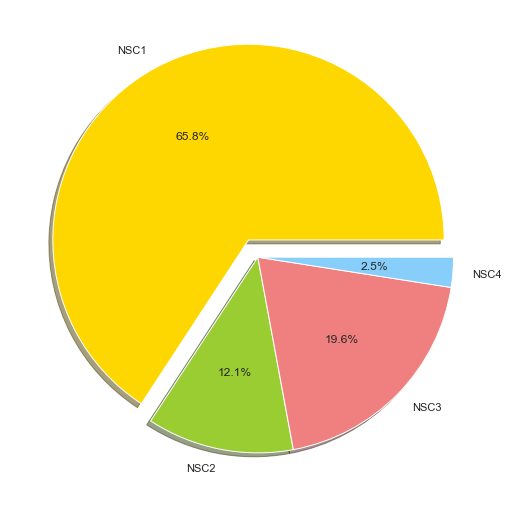

In [47]:
# Data to plot
labels = 'NSC1', 'NSC2', 'NSC3', 'NSC4'
sizes = [len(NSC1), len(NSC2), len(NSC3), len(NSC4)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.figure(figsize=(13, 9))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.show()

on cherche a déterminer le niveau de service de chaque station, il y a 44 stations, en effet :
    

In [49]:
gr = df.groupby('Code').groups
len(gr)

44

In [50]:
#Table de donnees de la station M7i
M8k = groupe.get_group('M8k')
#transformer la table en dataframe
M8k = pd.DataFrame(M8k)

,pr,m,To,Q,Vitesse,A,K
count,20338.0,20338.0,20338.000000,20338.000000,20338.000000,20338.0,20338.000000
mean,277.0,278.0,9.685761,2177.449602,83.596322,811.0,27.396720
std,0.0,0.0,7.329148,1314.454446,10.557489,0.0,18.334323
min,277.0,278.0,1.000000,20.000000,6.000000,811.0,1.785714
25%,277.0,278.0,4.000000,1100.000000,82.000000,811.0,12.676546
50%,277.0,278.0,8.000000,2020.000000,85.000000,811.0,24.606742
75%,277.0,278.0,14.000000,3180.000000,89.000000,811.0,39.411765
max,277.0,278.0,76.000000,6000.000000,111.000000,811.0,167.333333


In [51]:
# NSC 1 : trafic fluide.
NSC1 = M8k[(M8k['K'] <= 34)]
# NSC 2 : trafic de fluide a dense.
NSC2 = M8k[(M8k['K'] <= 42.65) & (M8k['K'] > 34)]
# NSC 3 : trafic dense.
NSC3 = M8k[(M8k['K'] <= 75.84) & (M8k['K'] > 42.65)]
# NSC 4 : trafic saturé.
NSC4 = M8k[(M8k['K'] > 75.84)]

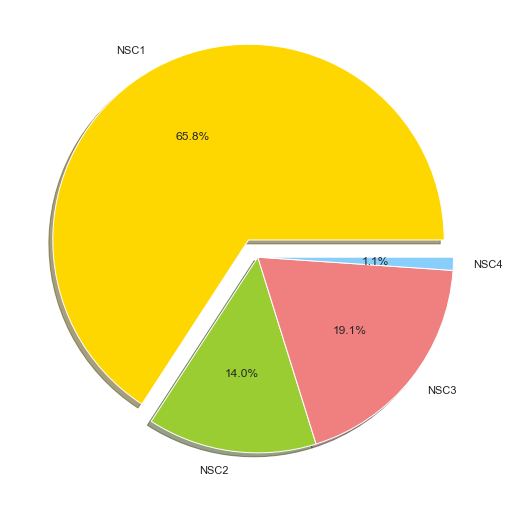

In [52]:
# Data to plot
labels = 'NSC1', 'NSC2', 'NSC3', 'NSC4'
sizes = [len(NSC1), len(NSC2), len(NSC3), len(NSC4)]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.figure(figsize=(13, 9))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.show()